In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, datasets, svm, metrics
import tensorflow.keras as tk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
#load data and reduce dementionality
(X_train, y_train), (X_test, y_test) = tk.datasets.mnist.load_data()
x_train = np.ones((60000,14,14))
x_test = np.ones((10000,14,14))


In [3]:
#normalization function
# to 0 to 1
def normalize(x):
    # array = (array) / 255
    x = (x - np.amin(x)) / (np.amax(x) - np.amin(x))
    return x

In [4]:
#normalize inputs
# x_train, x_val , x_test= normalize(x_train), normalize(x_val), normalize(x_test)
X_train, X_test= normalize(X_train), normalize(X_test)

In [5]:
#data exploration
# for i in range(10):
    # plt.imshow(x_train[i], cmap='gray')
    # print(y_train[i])
    # plt.show()

In [5]:
# reduce pixel function
def reduce_pix(x):
    y = np.copy(x)
    #fold up by half
    for i in range(0, 14):
        y[i] = (y[2*i] + y[2*i+1])/2
    y = y[ :14]
    #fold left by half
    for j in range(0, 14):
        y[ : , j] = (y[: , 2*j] +  y[: , 2*j+1])/2
    y = y[ :, :14] 
    return y

In [6]:
# reduce dimentionality, only run once!
for i in range(0,60000):
  x_train[i] = reduce_pix(X_train[i])
for i in range(0,10000):
  x_test[i] = reduce_pix(X_test[i])

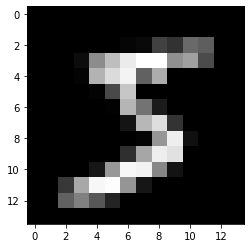

In [7]:
plt.imshow(x_train[0], cmap='gray')

In [7]:
#load data and split into train, val, test sets, only run once!
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/6, random_state=42)

## KNN - Find the closest image

In [18]:
# calculate the distance between two images
def calc_distance(img1, img2):
    dist = 0.0
    dist = sum(abs(img1-img2))
    return dist

# find the closest image's y value
def find_closest(x_train, y_train, img):
    closest_y = y_train[0]
    min_dist = float("inf")
    #update closes image
    for i in range(len(x_train)):
        distance = calc_distance(x_train[i], img)
        if distance < min_dist:
            min_dist = distance
            closest_y = y_train[i]
    return closest_y

# find two closest images' y value
def find_closest2(x_train, y_train, img):
    closest_y = y_train[0]
    closest_y2 = y_train[0]
    min_dist = float("inf")
    min_dist2 = float("inf")
    # keep track of two images
    for i in range(len(x_train)):
        distance = calc_distance(x_train[i], img)
        if distance < min_dist:
            min_dist2 = min_dist
            min_dist = distance
            closest_y = y_train[i]
    # return the average of two closest neighbors, floored
    return (closest_y + closest_y2)/2

In [10]:
print(find_closest(x_train[:1000], y_train[:1000], x_test[0]), y_test[0])

7 7


In [11]:
# make KNN predictions for 1 neighbor
y_pred_knn = []
for img in x_test:
    y_pred_knn.append(find_closest(x_train[:1000], y_train[:1000], img))

In [14]:
# calculate knn accuracy score

print(accuracy_score(y_test, y_pred_knn[1:]))

0.8766


In [9]:
#KNN for 2 neighbors
y_pred_knn2 = []
for img in x_test:
    y_pred_knn2.append(find_closest(x_train[2000:3000], y_train[2000:3000], img))

In [13]:
print(accuracy_score(y_test, y_pred_knn2))

0.876


## SKLearn Built-In Function

In [14]:
# sklearn model with gamma 0.1
clf = svm.SVC(gamma=0.1)
clf.fit(x_train, y_train)

SVC(gamma=0.1)

In [15]:
# create an array of predicted values
predicted = clf.predict(x_test)

In [16]:
# accuracy report of sklearn model
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.1):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




Confusion matrix:
[[ 972    0    2    0    0    2    1    1    2    0]
 [   0 1129    3    1    0    1    0    0    1    0]
 [   3    1 1016    0    1    0    1    6    4    0]
 [   0    0    1  998    0    2    0    5    3    1]
 [   0    0    5    0  964    0    1    0    1   11]
 [   2    0    0    7    0  874    3    1    4    1]
 [   6    3    0    0    2    5  941    0    1    0]
 [   1    8   11    1    2    0    0  996    1    8]
 [   3    0    1    5    4    3    0    2  953    3]
 [   2    4    2    4    8    2    1    5    5  976]]


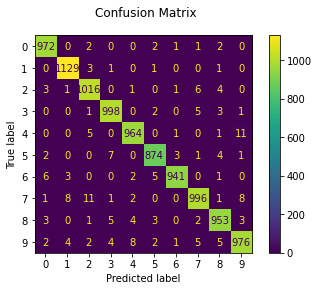

In [17]:
#confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()